In [1]:
import pandas as pd
import numpy as np 

In [2]:
bank_train = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/bank_marketing_training")

<AxesSubplot:ylabel='Frequency'>

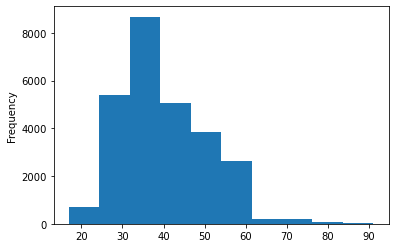

In [3]:
bank_train['age'].plot(kind='hist')

# CH 2.24

In [5]:
adult = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/adult_ch3_training")

# 3.4

In [7]:
bank_train[:2]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [8]:
bank_train.shape

(26874, 21)

In [9]:
bank_train['index'] = pd.Series(range(0,26874))

In [12]:
bank_train.head

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       41  blue-collar  married              unknown  unknown      no   no   
3       25     services   single          high.school       no     yes   no   
4       29  blue-collar   single          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
26869   36       admin.  married    university.degree       no      no   no   
26870   37       admin.  married    university.degree       no     yes   no   
26871   29   unemployed   single             basic.4y       no     yes   no   
26872   73      retired  married  professional.course       no     yes   no   
26873   46  blue-collar  married  professional.course       no      no   no   

         contact mont

In [14]:
bank_train['days_since_previous'] = bank_train['days_since_previous'].replace({999: np.NaN})

In [15]:
bank_train.head

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       41  blue-collar  married              unknown  unknown      no   no   
3       25     services   single          high.school       no     yes   no   
4       29  blue-collar   single          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
26869   36       admin.  married    university.degree       no      no   no   
26870   37       admin.  married    university.degree       no     yes   no   
26871   29   unemployed   single             basic.4y       no     yes   no   
26872   73      retired  married  professional.course       no     yes   no   
26873   46  blue-collar  married  professional.course       no      no   no   

         contact mont

<AxesSubplot:title={'center':'Histogram of Days Since Previous'}, ylabel='Frequency'>

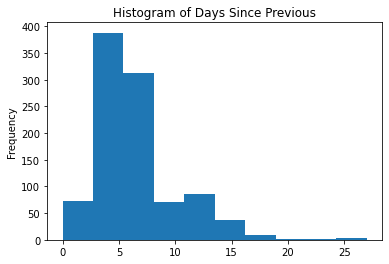

In [16]:
bank_train['days_since_previous'].plot(kind='hist', title = 'Histogram of Days Since Previous')

In [18]:
bank_train['education_numeric'] = bank_train['education']

In [20]:
bank_train.head

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       41  blue-collar  married              unknown  unknown      no   no   
3       25     services   single          high.school       no     yes   no   
4       29  blue-collar   single          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
26869   36       admin.  married    university.degree       no      no   no   
26870   37       admin.  married    university.degree       no     yes   no   
26871   29   unemployed   single             basic.4y       no     yes   no   
26872   73      retired  married  professional.course       no     yes   no   
26873   46  blue-collar  married  professional.course       no      no   no   

         contact mont

In [21]:
dict_edu = {"education_numeric": {"illiterate":0,
                                  "basic.4y":4,
                                  "basic.6y":6,
                                  "basic.9y":9, 
                                  "high.school":12,
                                  "professional.course":12,
                                  "university.degree":16,
                                  "unknown": np.NaN}}

In [22]:
bank_train.replace(dict_edu, inplace=True)

In [23]:
bank_train["education_numeric"]

0         4.0
1        12.0
2         NaN
3        12.0
4        12.0
         ... 
26869    16.0
26870    16.0
26871     4.0
26872    12.0
26873    12.0
Name: education_numeric, Length: 26874, dtype: float64

# 3.7.1 How to Standardize

In [24]:
from scipy import stats

In [25]:
bank_train['age_z'] = stats.zscore(bank_train['age'])

In [26]:
bank_train['age_z']

0        1.539625
1        1.635778
2        0.097330
3       -1.441118
4       -1.056506
           ...   
26869   -0.383435
26870   -0.287282
26871   -1.056506
26872    3.174226
26873    0.578095
Name: age_z, Length: 26874, dtype: float64

# 3.8.1 Identifying Outlier

In [32]:
bank_outliers = bank_train.query('age_z > 3 | age_z < -3')

In [33]:
bank_train_sort = bank_train.sort_values(['age_z'], ascending=False)

In [34]:
bank_train_sort[['age','marital']].head(n=15)

,age,marital
24840,91,married
24833,91,married
26520,89,divorced
26015,89,divorced
18179,88,divorced
18181,88,divorced
18183,88,divorced
18186,88,divorced
18187,88,divorced
18188,88,divorced


# CH3 HANDS-ON ANALYSIS

In [36]:
#3.21

In [49]:
 nutrition = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/Nutrition_subset")

In [169]:
nutrition.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,cholesterol_per_gram,saturated_fat_per_gram_z,cholesterol_per_gram_z
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000,0.000000,-0.562335,-0.379145
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219,0.000000,-0.135401,-0.379145
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000,0.000000,-0.562335,-0.379145
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476,0.776014,2.319472,0.770284
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000,0.790000,2.327397,0.791000


In [66]:
nutrition_sort = nutrition.sort_values(['saturated_fat'], ascending=False)

In [67]:
nutrition_sort.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


In [59]:
# It is hard to compare saturated fat since each food has different scales and sizes.
# We can compare saturated fat in food if saturated fat per gram is calculated.  

In [55]:
# 3.22

In [60]:
#saturated_fat_per_gram

In [69]:
nutrition['saturated_fat_per_gram'] = nutrition['saturated_fat'] 

In [70]:
nutrition.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.8
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,5.4
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,19.1


In [71]:
nutrition['saturated_fat_per_gram'] = nutrition['saturated_fat_per_gram'] / nutrition['weight_in_grams']
nutrition.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000


In [78]:
nutrition_sortBy_fatPerGram = nutrition.sort_values(['saturated_fat_per_gram'], ascending=False)
nutrition_sortBy_fatPerGram.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,cholesterol_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143,2.214286
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143,2.214286
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310,2.185841
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310,2.185841
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000,2.200000


In [73]:
# Butter salted has the most saturated fat per gram

In [74]:
# 3.23

In [75]:
nutrition.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000


In [76]:
nutrition['cholesterol_per_gram'] = nutrition['cholesterol'] / nutrition['weight_in_grams']
nutrition.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,cholesterol_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219,0.000000
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476,0.776014
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000,0.790000


In [77]:
nutrition_sortBy_cholesterolPerGram = nutrition.sort_values(['cholesterol_per_gram'], ascending=False)
nutrition_sortBy_cholesterolPerGram.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,cholesterol_per_gram
119,EGGS; RAW; YOLK 1 YOLK,17.0,1.6,213,0.094118,12.529412
58,CHICKEN LIVER; COOKED 1 LIVER,20.0,0.4,126,0.020000,6.300000
45,BEEF LIVER; FRIED 3 OZ,85.0,2.5,410,0.029412,4.823529
167,EGGS; COOKED; FRIED 1 EGG,46.0,1.9,211,0.041304,4.586957
186,EGGS; COOKED; HARD-COOKED 1 EGG,50.0,1.6,213,0.032000,4.260000


In [79]:
# Eggs, Raw, Yolk 1 yolk has the most cholesterol fat per gram

In [80]:
# 3.24

In [81]:
nutrition.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,cholesterol_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219,0.000000
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476,0.776014
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000,0.790000


In [84]:
from scipy import stats
nutrition['saturated_fat_per_gram_z'] = stats.zscore(nutrition['saturated_fat_per_gram'])
nutrition.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,cholesterol_per_gram,saturated_fat_per_gram_z
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000,0.000000,-0.562335
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219,0.000000,-0.135401
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000,0.000000,-0.562335
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476,0.776014,2.319472
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000,0.790000,2.327397


In [85]:
nutrition_fat_z_sort = nutrition.sort_values(['saturated_fat_per_gram_z'], ascending=False)
nutrition_fat_z_sort.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,cholesterol_per_gram,saturated_fat_per_gram_z
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143,2.214286,7.110475
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143,2.214286,7.110475
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310,2.185841,7.082741
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310,2.185841,7.082741
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000,2.200000,7.002408


In [112]:
nutrition_outliers_fat = nutrition_fat_z_sort.query('saturated_fat_per_gram_z > 3 | saturated_fat_per_gram_z < -3')
np.shape(nutrition_outliers_fat)

(15, 7)

In [114]:
nutrition_outliers_fat

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,cholesterol_per_gram,saturated_fat_per_gram_z
908,BUTTER; SALTED 1 TBSP,14.00,7.1,31,0.507143,2.214286,7.110475
909,BUTTER; UNSALTED 1 TBSP,14.00,7.1,31,0.507143,2.214286,7.110475
710,BUTTER; UNSALTED 1/2 CUP,113.00,57.1,247,0.505310,2.185841,7.082741
709,BUTTER; SALTED 1/2 CUP,113.00,57.1,247,0.505310,2.185841,7.082741
913,BUTTER; UNSALTED 1 PAT,5.00,2.5,11,0.500000,2.200000,7.002408
912,BUTTER; SALTED 1 PAT,5.00,2.5,11,0.500000,2.200000,7.002408
899,LARD 1 TBSP,13.00,5.1,12,0.392308,0.923077,5.373078
890,LARD 1 CUP,205.00,80.4,195,0.392195,0.951220,5.371375
920,IMITATION CREAMERS; POWDERED 1 TSP,2.00,0.7,0,0.350000,0.000000,4.732985
210,CHOCOLATE; BITTER OT BAKING 1 OZ,28.35,9.0,0,0.317460,0.000000,4.240676


In [102]:
# 15 foods are outliers are outliers at the high end of the scale.
# No foods is outlier at the low end of the scale.  

In [103]:
# 3.25

In [115]:
nutrition.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,cholesterol_per_gram,saturated_fat_per_gram_z
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000,0.000000,-0.562335
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219,0.000000,-0.135401
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000,0.000000,-0.562335
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476,0.776014,2.319472
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000,0.790000,2.327397


In [117]:
from scipy import stats
nutrition['cholesterol_per_gram_z'] = stats.zscore(nutrition['cholesterol_per_gram'])
nutrition.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,cholesterol_per_gram,saturated_fat_per_gram_z,cholesterol_per_gram_z
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000,0.000000,-0.562335,-0.379145
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219,0.000000,-0.135401,-0.379145
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000,0.000000,-0.562335,-0.379145
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476,0.776014,2.319472,0.770284
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000,0.790000,2.327397,0.791000


In [118]:
nutrition_chol_z_sort = nutrition.sort_values(['cholesterol_per_gram_z'], ascending=False)
nutrition_chol_z_sort.head(n=5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,cholesterol_per_gram,saturated_fat_per_gram_z,cholesterol_per_gram_z
119,EGGS; RAW; YOLK 1 YOLK,17.0,1.6,213,0.094118,12.529412,0.861616,18.179372
58,CHICKEN LIVER; COOKED 1 LIVER,20.0,0.4,126,0.020000,6.300000,-0.259746,8.952391
45,BEEF LIVER; FRIED 3 OZ,85.0,2.5,410,0.029412,4.823529,-0.117350,6.765448
167,EGGS; COOKED; FRIED 1 EGG,46.0,1.9,211,0.041304,4.586957,0.062578,6.415037
186,EGGS; COOKED; HARD-COOKED 1 EGG,50.0,1.6,213,0.032000,4.260000,-0.078192,5.930750


In [119]:
nutrition_outliers_chol = nutrition_chol_z_sort.query('cholesterol_per_gram_z > 3')
np.shape(nutrition_outliers_chol)

(8, 8)

In [123]:
nutrition_outliers_chol

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,cholesterol_per_gram,saturated_fat_per_gram_z,cholesterol_per_gram_z
119,EGGS; RAW; YOLK 1 YOLK,17.0,1.6,213,0.094118,12.529412,0.861616,18.179372
58,CHICKEN LIVER; COOKED 1 LIVER,20.0,0.4,126,0.020000,6.300000,-0.259746,8.952391
45,BEEF LIVER; FRIED 3 OZ,85.0,2.5,410,0.029412,4.823529,-0.117350,6.765448
167,EGGS; COOKED; FRIED 1 EGG,46.0,1.9,211,0.041304,4.586957,0.062578,6.415037
186,EGGS; COOKED; HARD-COOKED 1 EGG,50.0,1.6,213,0.032000,4.260000,-0.078192,5.930750
184,EGGS; RAW; WHOLE 1 EGG,50.0,1.6,213,0.032000,4.260000,-0.078192,5.930750
185,EGGS; COOKED; POACHED 1 EGG,50.0,1.5,212,0.030000,4.240000,-0.108451,5.901127
189,EGGS; COOKED; SCRAMBLED/OMELET1 EGG,61.0,2.2,215,0.036066,3.524590,-0.016682,4.841464


In [124]:
# 3.26

In [126]:
adult = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/adult_ch3_training")
adult.head(n=5)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


In [128]:
adult.shape

(14797, 9)

In [129]:
adult['index'] = pd.Series(range(0,14797))

In [131]:
adult.head(n=5)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4


In [132]:
# 3.27

In [133]:
from scipy import stats
adult['education_z'] = stats.zscore(adult['education'])
adult.head(n=5)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0,1.128163
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1,-0.411359
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2,-1.950881
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3,-0.411359
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4,1.513043


In [134]:
adult_education_z_sort = adult.sort_values(['education_z'], ascending=False)
adult_education_z_sort.head(n=5)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z
14566,59,Private,16,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,14566,2.282804
10238,53,State-gov,16,Married-civ-spouse,Prof-specialty,Male,0,0,>50K,10238,2.282804
5244,47,Federal-gov,16,Married-civ-spouse,Prof-specialty,Male,0,0,>50K,5244,2.282804
7452,53,Private,16,Divorced,Prof-specialty,Male,0,0,<=50K,7452,2.282804
2849,79,Private,16,Married-civ-spouse,Prof-specialty,Male,20051,0,>50K,2849,2.282804


In [136]:
adult_outliers_education = adult_education_z_sort.query('education_z > 3')
adult_outliers_education

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z


In [138]:
# No outlier in education field

In [153]:
# 3.28

In [144]:
adult['age_z'] = stats.zscore(adult['age'])

In [145]:
adult_age_z_sort = adult.sort_values(['age_z'], ascending=False)
adult_age_z_sort.head(n=5)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z,age_z
1066,90,Private,10,Never-married,Other-service,Male,0,0,<=50K,1066,-0.026479,3.751354
7254,90,Private,13,Married-civ-spouse,Exec-managerial,Female,0,0,>50K,7254,1.128163,3.751354
11562,90,?,4,Separated,?,Female,0,0,<=50K,11562,-2.335762,3.751354
4680,90,Self-emp-not-inc,10,Married-civ-spouse,Farming-fishing,Male,0,0,<=50K,4680,-0.026479,3.751354
12948,90,Federal-gov,9,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,12948,-0.411359,3.751354


In [146]:
adult_outliers_age = adult_age_z_sort.query('age_z > 3 | age_z < -3')
adult_outliers_age.shape

(60, 12)

In [151]:
adult_outliers_age.head(n=5)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z,age_z
1066,90,Private,10,Never-married,Other-service,Male,0,0,<=50K,1066,-0.026479,3.751354
7254,90,Private,13,Married-civ-spouse,Exec-managerial,Female,0,0,>50K,7254,1.128163,3.751354
11562,90,?,4,Separated,?,Female,0,0,<=50K,11562,-2.335762,3.751354
4680,90,Self-emp-not-inc,10,Married-civ-spouse,Farming-fishing,Male,0,0,<=50K,4680,-0.026479,3.751354
12948,90,Federal-gov,9,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,12948,-0.411359,3.751354


In [152]:
# There are 60 outliers in age field.

In [154]:
# 3.29

In [155]:
adult.head(n=5)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z,age_z
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0,1.128163,0.827038
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1,-0.411359,-0.050257
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2,-1.950881,0.753930
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3,-0.411359,0.973254
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4,1.513043,-0.562012


In [156]:
adult['capital-gain-flag'] = adult['capital-gain']
adult.head(n=5)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z,age_z,capital-gain-flag
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0,1.128163,0.827038,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1,-0.411359,-0.050257,0
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2,-1.950881,0.753930,0
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3,-0.411359,0.973254,0
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4,1.513043,-0.562012,14084


In [161]:
adult.loc[adult['capital-gain-flag'] != 0, 'capital-gain-flag'] = 1
adult.head(n=5)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z,age_z,capital-gain-flag
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0,1.128163,0.827038,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1,-0.411359,-0.050257,0
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2,-1.950881,0.753930,0
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3,-0.411359,0.973254,0
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4,1.513043,-0.562012,1


In [162]:
# 3.30

In [166]:
age_80 = adult[(adult['age'] > 80)]
age_80.shape

(50, 13)

<AxesSubplot:title={'center':'Histogram of Age at least 80'}, ylabel='Frequency'>

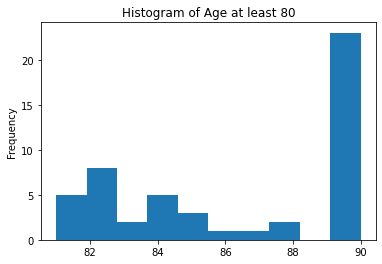

In [167]:
age_80['age'].plot(kind = 'hist', title = 'Histogram of Age at least 80')

In [168]:
# The age records over 88 are relatively shown more than others.
# No idea